# Random Forests Sınıflandırma

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

Birbirinden farklı ve birden çok ağaç oluşturulur ve her bir ağacın ürettiği tahminleri bir araya getirerek sınıf tahmini değerini vermiş olur.

* Bagging ile Random Subspace yöntemlerinin birleşimi ile oluşmuştur.
* Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile **değişkenler random subspace yöntemi ile seçilir.**
* Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
* Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.
* Her düğüm noktasında rastgele değişken seçimi yapılır. (regresyon'da p/3, sınıflama'da karekök p şeklinde değişken seçme işlemi gerçekleşmiş olur)
* Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir.

* Ağaçlar için gözlemler bootstrap rastgele örneklem seçim yöntemi ile seçilir. Örneğin 500 tane ağaç gözlemler yerine koyacak şekilde tekrar tekrar seçilir

* Karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken, tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken, arasından seçilir. 


karar ağaçlarında değişkenlerin önem düzeylerini ifade etmiştik ve en tepedeki değişkenin en çok katkı sağlayan değişken olduğunu ifade etmiştik işte bu en çok katkı sağlayan değişkenler her dallanmada random forests ile seçiliyor ve bu her seçilme işlemiyse veri setinin 10 değişkeni içerisinden 5 değişken arasından seçilmiş oluyor böylece değişkenlerdeki rassallıkta sağlanmış olur her bir ağaç için farklı değişken setleri ve farklı ağaçlar oluşabilmesi ve topluluk öğrenme yaklaşımıdır

* Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir.

Bagging sadece gözlemleri rassallaştırarak oluşan ağaçlardır.

rf değişken seçimine de rassallığı getirmiştir. yani hem gözlemleri seçip rastgele ağaçlar oluşturdu hemde ağaçların içerisinde dallanmalarda kullanılacak olan değişkenlerin seçiminede bir rassallık getirdi

* Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.

rf'nin bagging'den diğer bir farkı ise ağaçları kendi içerisinde değerlendirir ve ağaçları başarılarına göre tahmin sonuçlarını oranlayıp nihai tahmin sonucunu verir

In [1]:
# uyarılar gözükmesin diye
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
# bilgilerin gözükmesi için
from sklearn import set_config
set_config(print_changed_only=False)

# Random Forests Sınıflandırma - Model & Tahmin

In [1]:
import pandas as pd
# veri setimizi import edelim
diabetes = pd.read_csv("diabetes.csv")

In [2]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                   random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
# modeli kurdum
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [6]:
# y test tahmin değerleri
y_pred = rf_model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
# doğruluk oranı
accuracy_score(y_test, y_pred)

0.7402597402597403

# Random Forests Sınıflandırma - Model Tuning

In [11]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
?rf_model

Type:        RandomForestClassifier
String form:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
           c <...> obs=None, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Length:      100
File:        /opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini"

* n_estimators: kullanılacak olan ağaç sayısı (500 ya da 1000 gibi değerleri alır)
* min_samples_split: bölünmelerde göz önünde bulundurulan değişken sayısı. aşırı öğrenmeyi (overfitting) engellemek için
* max_depth: maksimum derinlik. aşırı öğrenmeyi (overfitting) engellemek için
* max_features: bölünmelerde göz önünde bulundurulacak değişken sayısı

Random forest yapısı itibariyle rassallığı sağlar. o yüzden cart modelinde önemli olan parametreler burada daha az önemlidir

In [14]:
rf_params = {"max_depth": [3,5,8,10], # derinlik
            "max_features": [2,5,8], # değişken sayısı
            "n_estimators":[10,500,1000], # tahminci sayısı/ ağaç sayısı
             "min_samples_split": [2,5,10]} # bölünmelerde göz önünde bulundurulan değişken sayısı

In [15]:
# max değişken sayısı (bütün değişkenler) = bagging
# bagging'de değişkenlerde rassallık sağlanmaz
# bagging bu durumda rf'nin özel bir durumudur diyebiliriz

her ağaç eğitiminde rastgele olarak 8 bağımsız değişken seçilecektir. Ancak, eğer bağımsız değişkenlerinizin toplam sayısı 8 veya daha azsa, bu durumda her ağaç tüm bağımsız değişkenleri kullanacaktır.

In [23]:
rf_model = RandomForestClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

In [20]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=2, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END max_depth=3, max_features=2, min_samples_split=5, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=2, min_samples_split=10, n_estimators=500; total time=   0.5s
[CV] END max_depth=3, max_features=2, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=5, m

In [21]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [24]:
# final modeli
rf_tuned = RandomForestClassifier(max_depth=10,
                                  max_features=5, # her bölünmede 5 tane değişkeni göz önünde bulundur
                                  min_samples_split=10,
                                  n_estimators=500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
# y test tahminleri
y_pred = rf_tuned.predict(X_test)

In [26]:
# doğruluk oranı
accuracy_score(y_test, y_pred)

0.7445887445887446

## Değişkenlerin önem düzeyleri

In [27]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index=X_train.columns)

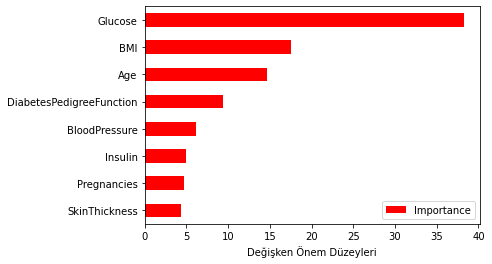

In [33]:
import matplotlib.pyplot as plt

Importance.sort_values(by="Importance",
                      axis=0,
                      ascending = True).plot(kind="barh", color="r");


plt.xlabel("Değişken Önem Düzeyleri");

In [ ]:
# örneğin bir kişi diyabet hastasıysa
# doktor bu bilgilere bakarak karar destek sisteminden önleyici tıp çalışması sağlar
# BMI(vucüt kitle indeksi) yüksekse kilo ver diyebilir.

Değişkenlerin önem düzeylerinede bakmalıyız bir makine öğrenmesi süreci eksik veri analizi, veri ön işleme, değişken dönüştürme, feature enginnering, yeni değişkenler üretme, değişkenlerin önem düzeylerinin anlamlılık düzeylerinin incelenmesi, modele sağladıkları katkıların incelenmesi, gerektiğinde modelden çıkarılması, başka değişkenlerin eklenmesi ve benzeri şekillerle de işlemleri sürdürmek gerekiyor

örneğin modellerin en optimum parametrelerini bulduğumuzu düşünelim. gbm, xgboost, random forests catboost, lightgbm vs. bu optimum parametreleri bulunur.

burada fark yaratılan yer değişen müh, veri ön işleme, değişkenler, değişkenlerin birbiriyle ilişkileri, bağımlı değişkeni ayırt edicilik anlamında nasıl etkilediği